# Overfitting Demo

## Create a datset with a true sinusoidal relationship

In [1]:
import graphlab
import numpy
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

Create random value for x in interval [0,1)

In [2]:
random.seed(98103)
n = 30 
x = graphlab.SArray([random.random() for i in range(n)]).sort()

This non-commercial license of GraphLab Create for academic use is assigned to prashantbhat94@gmail.com and will expire on February 13, 2020.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\user\AppData\Local\Temp\graphlab_server_1552752857.log.0


Compute y

In [3]:
y = x.apply(lambda x: math.sin(4*x))

Add random gaussian noise 

In [4]:
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y+e

## Put the data into an Sframe to manipulate it later

In [5]:
data = graphlab.SFrame({'X1':x,'Y':y})
data

X1,Y
0.0395789449501,0.587050191026
0.0415680996791,0.648655851372
0.0724319480801,0.307803309485
0.150289044622,0.310748447417
0.161334144502,0.237409625496
0.191956312795,0.705017157224
0.232833917145,0.461716676992
0.259900980166,0.383260507851
0.380145814869,1.06517691429
0.432444723508,1.03184706949


### Create a function to plot the data

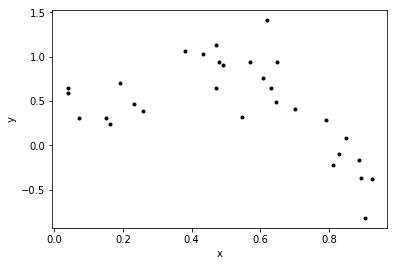

In [6]:
def plot_data(data):
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')
plot_data(data)

# Define some useful polynomial regression functions

In [7]:
def polynomial_features(data, deg):
    data_copy = data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)] = data_copy['X1'] * data_copy['X'+str(i)]
    return data_copy

Define a function to fit a polynomial regression function

In [8]:
def polynomial_regression(data,deg):
    model = graphlab.linear_regression.create(polynomial_features(data,deg),target='Y', l2_penalty=0.,l1_penalty=0.,validation_set=None,verbose=False)
    return model
    

Define a function to display the plot of predictions

In [9]:
def plot_poly_predictions(data,model):
    plot_data(data)
    #Get the degree of the polynomial regression model
    deg = len(model.coefficients['value'])-1
    #Create 200 points on the x-axis and compute the predicted value for each point
    x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    #plot predictions
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

In [10]:
def print_coefficients(model):    
    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1

    # Get learned parameters as a list
    w = list(model.coefficients['value'])

    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print 'Learned polynomial for degree ' + str(deg) + ':'
    w.reverse()
    print numpy.poly1d(w)

## Fit a degree-2 polynomial

In [11]:
model = polynomial_regression(data, deg=2)

In [12]:
print_coefficients(model)

Learned polynomial for degree 2:
        2
-5.129 x + 4.147 x + 0.07471


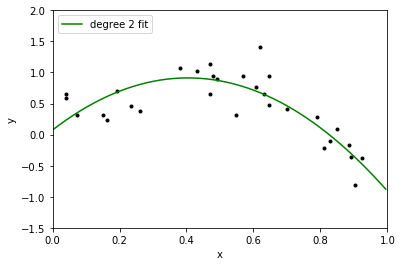

In [13]:
plot_poly_predictions(data,model)

## Fit a degree-4 polynomial

Learned polynomial for degree 4:
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


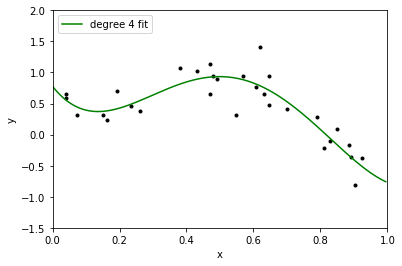

In [14]:
model = polynomial_regression(data, deg=4)
print_coefficients(model)
plot_poly_predictions(data,model)

## Fit a degree-16 polynomial

In [15]:
model = polynomial_regression(data, deg=16)
print_coefficients(model)

Learned polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


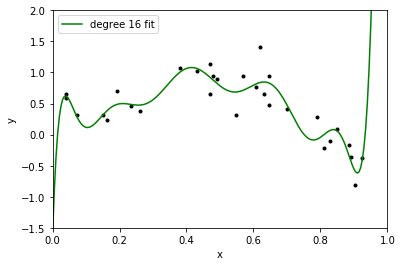

In [16]:
plot_poly_predictions(data,model)

# Ridge Regression

In [21]:
def polynomial_ridge_regression(data, deg, l2_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=l2_penalty,
                                              validation_set=None,verbose=False)
    return model

# Perform a ridge fit of a degree 16 polynomial using a very small penalty

In [22]:
model = polynomial_ridge_regression(data, deg=16, l2_penalty=1e-25)
print_coefficients(model)

Learned polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


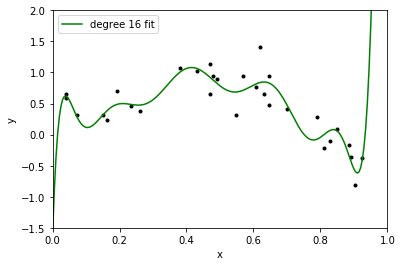

In [23]:
plot_poly_predictions(data,model)

## Perform a ridge fit of a degree-16 polynomial using a very large penalty

In [24]:
model = polynomial_ridge_regression(data,deg=16,l2_penalty=100)
print_coefficients(model)

Learned polynomial for degree 16:
        16          15          14          13          12         11
-0.301 x  - 0.2802 x  - 0.2604 x  - 0.2413 x  - 0.2229 x  - 0.205 x 
           10          9          8          7          6           5
 - 0.1874 x  - 0.1699 x - 0.1524 x - 0.1344 x - 0.1156 x - 0.09534 x
            4           3           2
 - 0.07304 x - 0.04842 x - 0.02284 x - 0.002257 x + 0.6416


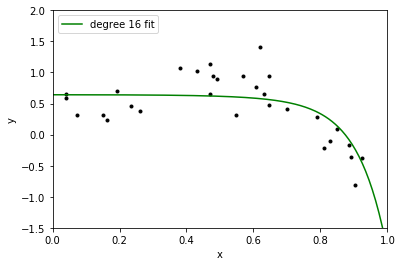

In [25]:
plot_poly_predictions(data,model)

## Let's look at fits for a sequence of increasing lambda values

lambda = 1.00e-25
Learned polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


lambda = 1.00e-10
Learned polynomial for degree 16:
           16             15             14             13
4.975e+04 x  - 7.821e+04 x  - 2.265e+04 x  + 3.949e+04 x 
              12        11             10             9             8
 + 4.366e+04 x  + 3074 x  - 3.332e+04 x  - 2.786e+04 x + 1.032e+04 x
              7        6             5             4        3         2
 + 2.962e+04 x - 1440 x - 2.597e+04 x + 1.839e+04 x - 5596 x + 866.1 x - 65.19 x + 2.159


lambda = 1.00e-06
Learned polyn

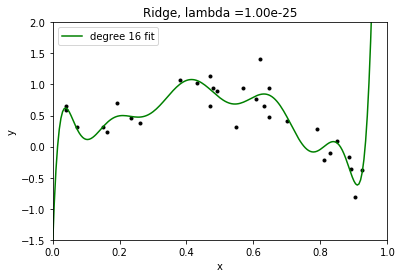

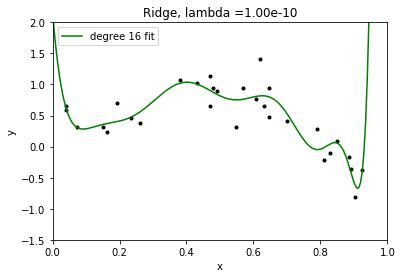

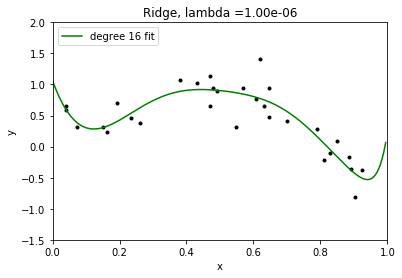

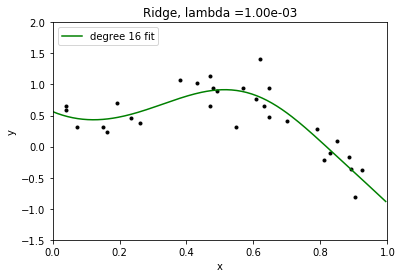

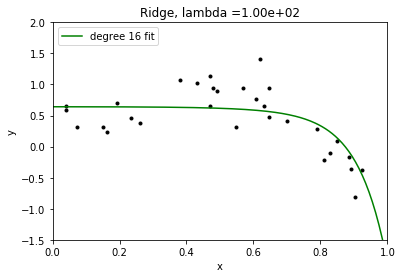

In [26]:
for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
    model = polynomial_ridge_regression(data, deg=16, l2_penalty=l2_penalty)
    print ('lambda = %.2e' %l2_penalty)
    print_coefficients(model)
    print('\n')
    plt.figure()
    plot_poly_predictions(data,model)
    plt.title('Ridge, lambda =%.2e'% l2_penalty)

## Perform a ridge fit of degree-16 polynomial using a g"good" penalty strength

We will learn about cross validation later in this course as a way to select a good value of the tuning parameter (penalty strength) lambda.  Here, we consider "leave one out" (LOO) cross validation, which one can show approximates average mean square error (MSE).  As a result, choosing lambda to minimize the LOO error is equivalent to choosing lambda to minimize an approximation to average MSE.

In [27]:
def loo(data,deg,l2_penalty_values):
    #Create a polynomial_features
    data = polynomial_features(data,deg)
    
    #Create as many folds for cross validations as number of data points
    num_folds = len(data)
    folds = graphlab.cross_validation.KFold(data,num_folds)
    
    #for each value of l2_penalty, fit a model for each fold anf compute average MSE
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set,validation_set in folds:
            #train model
            model = graphlab.linear_regression.create(train_set, target ='Y', l2_penalty=l2_penalty, validation_set=None,verbose=False)
            y_test_predcited = model.predict(validation_set)
            #compute squared error
            next_mse += ((y_test_predcited-validation_set['Y'])**2).sum()
        next_mse = next_mse/num_folds
        l2_penalty_mse.append(next_mse)
        if min_mse is None or next_mse<min_mse:
            min_mse = next_mse
            best_l2_penalty=l2_penalty
    return l2_penalty_mse,best_l2_penalty
        

Run LOO cross validation for "num" values of lambda, on a log scale

In [28]:
l2_penalty_values = numpy.logspace(-4, 10, num=10)
l2_penalty_mse,best_l2_penalty = loo(data, 16, l2_penalty_values)

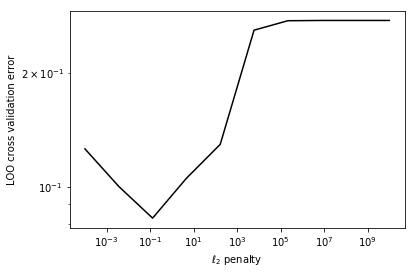

In [29]:
plt.plot(l2_penalty_values,l2_penalty_mse,'k-')
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('LOO cross validation error')
plt.xscale('log')
plt.yscale('log')

In [30]:
best_l2_penalty

0.1291549665014884

In [31]:
model = polynomial_ridge_regression(data, deg=16, l2_penalty=best_l2_penalty)
print_coefficients(model)

Learned polynomial for degree 16:
       16         15          14          13          12           11
1.345 x  + 1.141 x  + 0.9069 x  + 0.6447 x  + 0.3569 x  + 0.04947 x 
           10          9          8         7         6         5
 - 0.2683 x  - 0.5821 x - 0.8701 x - 1.099 x - 1.216 x - 1.145 x
           4           3          2
 - 0.7837 x - 0.07406 x + 0.7614 x + 0.7703 x + 0.3918


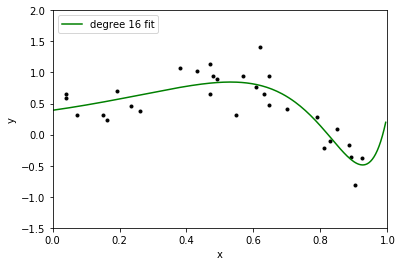

In [33]:
plot_poly_predictions(data,model)

# Lasso Regression

Lasso regression jointly shrinks coefficients to avoid overfitting, and implicitly performs feature selection by setting some coefficients exactly to 0 for sufficiently large penalty strength lambda (here called "L1_penalty").  In particular, lasso takes the RSS term of standard least squares and adds a 1-norm cost of the coefficients $\|w\|$.

In [34]:
def polynomial_lasso_regression(data, deg, l1_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=0.,
                                              l1_penalty=l1_penalty,
                                              validation_set=None, 
                                              solver='fista', verbose=False,
                                              max_iterations=3000, convergence_threshold=1e-10)
    return model

l1_penalty = 1.000000e-04
number of nonzeros = 17
Learned polynomial for degree 16:
       16        15         14         13         12         11
29.02 x  + 1.35 x  - 12.72 x  - 16.93 x  - 13.82 x  - 6.698 x 
          10         9         8         7         6         5
 + 1.407 x  + 8.939 x + 12.88 x + 11.44 x + 3.759 x - 8.062 x
          4         3         2
 - 16.28 x - 7.682 x + 17.86 x - 4.384 x + 0.685


l1_penalty = 1.000000e-02
number of nonzeros = 13
Learned polynomial for degree 16:
       16            15           11          10         9          8
-1.18 x  - 0.002259 x  + 0.08773 x  + 0.7392 x  + 3.829 x + 0.4765 x
           7          5         4             3         2
 + 0.1287 x - 0.6147 x - 10.11 x - 0.0003958 x + 6.686 x - 1.28 x + 0.5056


l1_penalty = 1.000000e-01
number of nonzeros = 5
Learned polynomial for degree 16:
      16         6         5
2.21 x  - 1.002 x - 2.962 x + 1.216 x + 0.3473


l1_penalty = 1.000000e+01
number of nonzeros = 2
Learned polyn

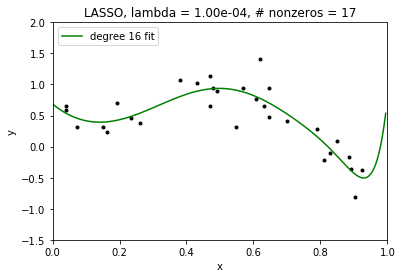

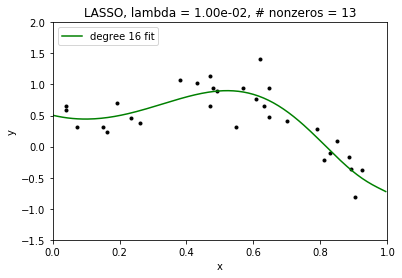

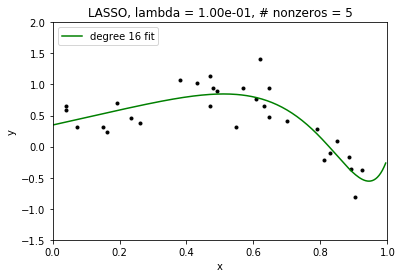

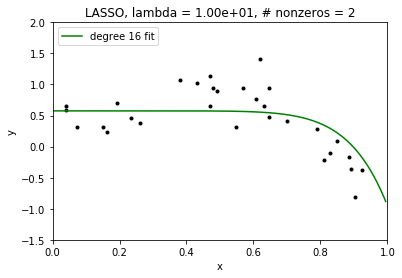

In [35]:
for l1_penalty in [0.0001, 0.01, 0.1, 10]:
    model = polynomial_lasso_regression(data, deg=16, l1_penalty=l1_penalty)
    print 'l1_penalty = %e' % l1_penalty
    print 'number of nonzeros = %d' % (model.coefficients['value']).nnz()
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_poly_predictions(data,model)
    plt.title('LASSO, lambda = %.2e, # nonzeros = %d' % (l1_penalty, (model.coefficients['value']).nnz()))